In [2]:
import os
import shutil
import cv2
from matplotlib import pyplot as plt

#Image augumenter
import imgaug as ia
import imgaug.augmenters as iaa

# Path Constants

In [4]:
DatasetPath = "Structured_DANUBE\\"
Destination="Structured_DANUBE\\ALL\\Train\\"

In [16]:
dirListing = os.listdir(DatasetPath)
editFiles = []
for item in dirListing:
        if "ALL" not in item:
                editFiles.append(item)
print (editFiles)

['AnimalFood', 'Beverages', 'canned', 'canned2', 'Cleaners', 'Cleaners2', 'Cleaners3', 'Coffee', 'Confectionery', 'Dairy', 'Dairy2', 'dairy3', 'Drinks', 'drinks2', 'DryFoods', 'Icecream', 'Pickeled', 'Plasticgoods', 'rice', 'Sauces', 'Sauces2', 'Sauces3', 'Seasoning', 'Water']


# Copy files to one location

In [37]:
for classname in editFiles:
    Classlisting = os.listdir(DatasetPath+classname+"\\")
    classfiles = []
    for item in Classlisting:
        classfiles.append(item)
        print (classfiles)   
        shutil.copytree(DatasetPath+classname+"\\"+item, Destination+item)


['bag-animalfood-cutey-catfood']
['bag-animalfood-cutey-catfood', 'bag-animalfood-dentalife-dogfood']
['bag-animalfood-cutey-catfood', 'bag-animalfood-dentalife-dogfood', 'bag-animalfood-felix-catfood']
['bag-animalfood-cutey-catfood', 'bag-animalfood-dentalife-dogfood', 'bag-animalfood-felix-catfood', 'bag-animalfood-pubina-catfood']
['bag-animalfood-cutey-catfood', 'bag-animalfood-dentalife-dogfood', 'bag-animalfood-felix-catfood', 'bag-animalfood-pubina-catfood', 'bag-animalfood-siso-fishfood']
['bag-animalfood-cutey-catfood', 'bag-animalfood-dentalife-dogfood', 'bag-animalfood-felix-catfood', 'bag-animalfood-pubina-catfood', 'bag-animalfood-siso-fishfood', 'bag-animalfood-temptations-catfood']
['bag-animalfood-cutey-catfood', 'bag-animalfood-dentalife-dogfood', 'bag-animalfood-felix-catfood', 'bag-animalfood-pubina-catfood', 'bag-animalfood-siso-fishfood', 'bag-animalfood-temptations-catfood', 'bag-animalfood-whiskas-catfood']
['bag-animalfood-cutey-catfood', 'bag-animalfood-dental

# Rename all training files to the format of Train_number

In [3]:
Datasetlocation="Structured_DANUBE\ALL\Train\\"

In [54]:
classesname = os.listdir(Datasetlocation)
for item in classesname:
        classimages = os.listdir(Datasetlocation+item)
        
        counter=0
        for classimage in classimages:
                os.rename(Datasetlocation+item+"\\"+classimage, Datasetlocation+item+"\\"+'Train'+str(counter)+".jpg")
                counter+=1


## Get the number of instances in each class then save it to a dictionary

In [139]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1


In [140]:
len(class_count)

621

# Plot class distribution

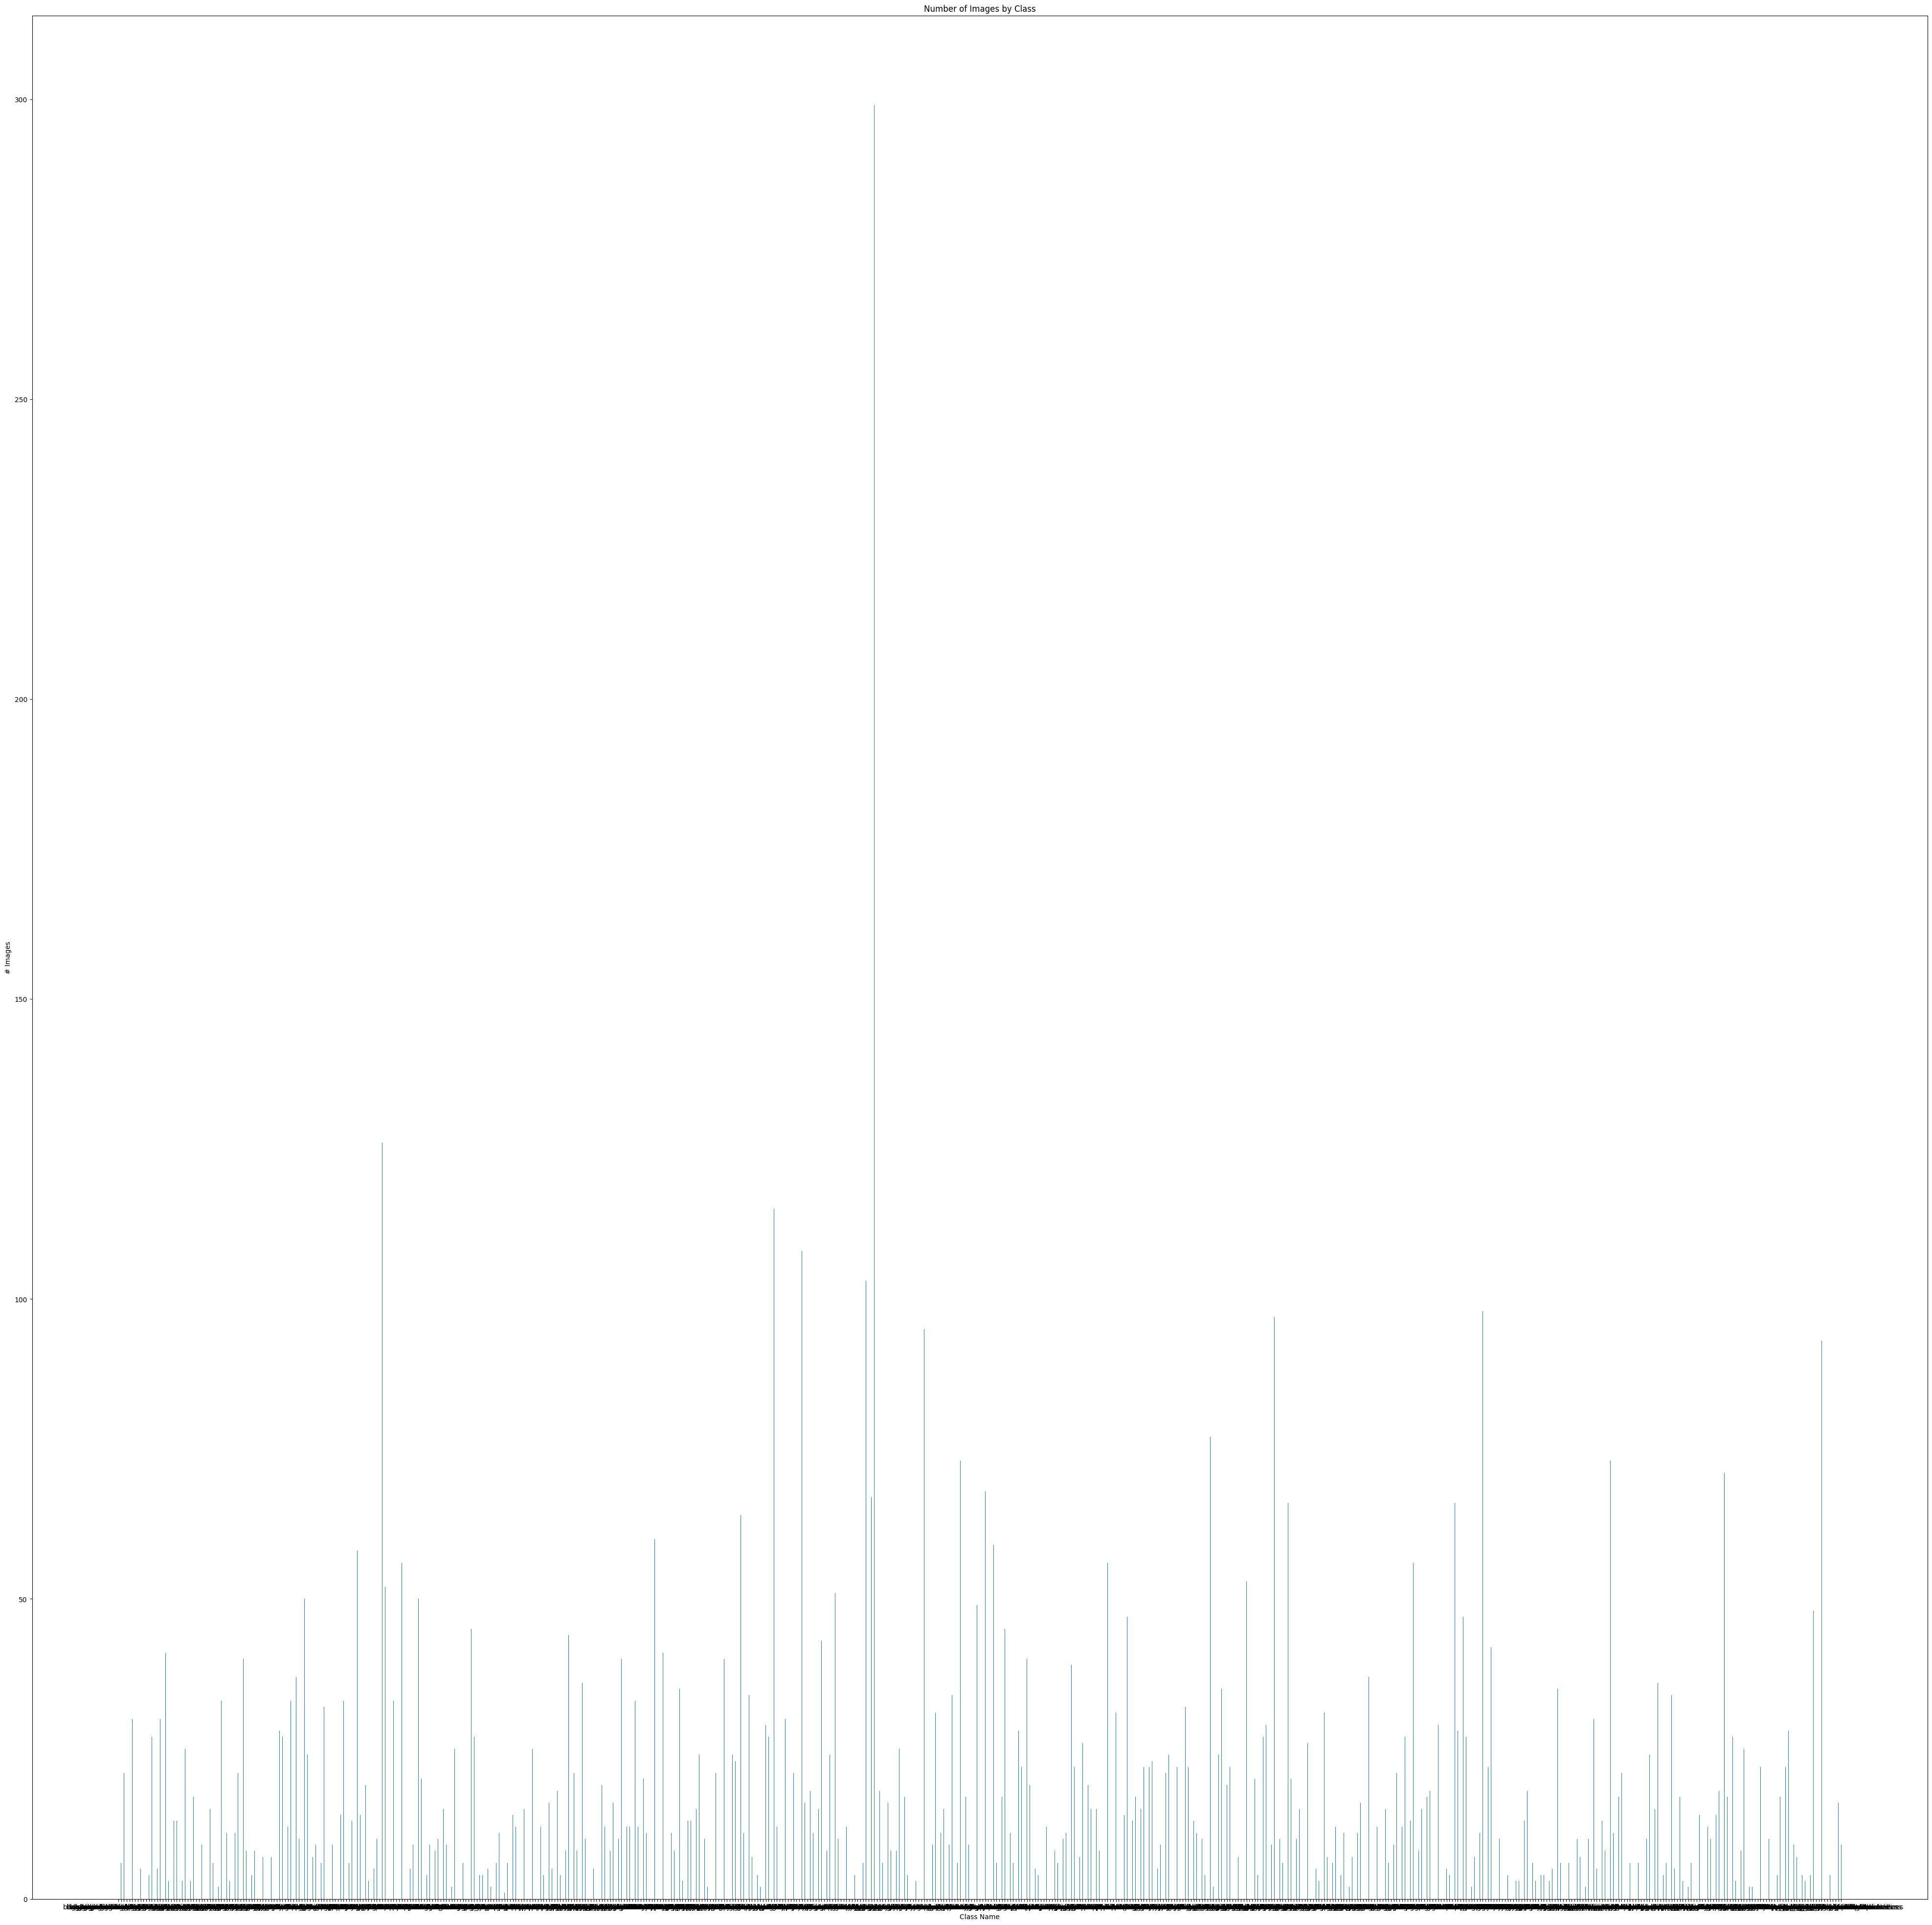

In [141]:
plt.figure(figsize=(50,50))
plt.bar(class_count.keys(), class_count.values(), width = .1);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [143]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
        if len(os.listdir(Datasetlocation+item)) <3:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1

In [144]:
len(class_count)

19

# Delete any class that has less than 3 instances

In [146]:
for classname in class_count:
    shutil.rmtree(Datasetlocation+classname)

# Recheck classes

In [151]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
        if len(os.listdir(Datasetlocation+item)) <30:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1

In [152]:
len(class_count)

477

# Begin image augumentation: 


#### 4 times for classes with less than 5 instances
#### 3 times for classes with less than 30 instances
#### 1 time for classes with less than 50 instances
#### 1 time for classes with instances between 30 and 90



# Preset

In [25]:
seq2 = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0.05, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
        iaa.GaussianBlur(sigma=(0, 0.5)),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.7, 1.6)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.4), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-10, 10),
        shear=(-10, 10)
    )
], random_order=True) # apply augmenters in random order

In [42]:
imagesarray=[]
img=cv2.imread("Structured_DANUBE\drinks2\glassbottle-softdrink-pepsi-softdrink\Train77.jpg")
imagesarray.append(img)
augumentedimg=seq2(images=imagesarray)



cv2.imshow("Image",augumentedimg[0])
cv2.waitKey(0)
cv2.imwrite("Augumentedimages\\imagetest.jpg", augumentedimg[0])

True

# Apply preset 4 times for classes with less than 5 instances

# Instances pre augumentation: 12,621 

In [60]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
        if len(os.listdir(Datasetlocation+item)) <5:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1
len(class_count)

60

In [61]:
class_count

{'bag-cleaners-gento-laundrywashingpowder': 4,
 'bag-dairy-alsafi-mozzarella': 3,
 'bag-dairy-president-chedder': 3,
 'bag-dairy-puck-chedder': 3,
 'bag-dairy-sunbulah-mozzarella': 3,
 'bag-dryfoods-azayim-rice': 3,
 'bag-dryfoods-makati-rice': 4,
 'bottle-dairy-nadec-laban': 3,
 'bottle-nonsoftdrinks-purelife-water': 4,
 'bottle-sauces-lono-ketchup': 4,
 'bottle-sauces-makati-ketchup': 4,
 'bottle-sauces-toya-ketchup': 3,
 'box-canned-alkaseeh-chickpeas': 4,
 'box-cleaners-airwick-airfreshener': 4,
 'box-cleaners-sanita-disposablegloves': 4,
 'box-dairy-president-cheddercheese': 4,
 'box-plasticgoods-sanita-cookingpaper': 4,
 'boxedbottle-dairy-alpro-milk': 4,
 'boxedbottle-dairy-elle&vine-cookingcream': 3,
 'boxedbottle-sauce-puck-lemonbutter': 4,
 'boxedbottle-sauce-puck-tomatowithcream': 3,
 'can-canned-freshly-helba': 4,
 'can-canned-freshly-slicedbeets': 4,
 'can-canned-freshly-vegetables': 4,
 "can-canned-libby's-greenpeas": 4,
 "can-canned-libby's-vegetables": 4,
 'can-canned-l

In [62]:
counter=1
for x in range(4):

   for classname in class_count:
       imagesarray=[]
       imagenames = os.listdir(Datasetlocation+classname)
       print(imagenames)
       
       #Save images to array
       for imagename in imagenames:
           if "augumented" not in imagename:
            img=cv2.imread(Datasetlocation+classname+"\\"+imagename)
            imagesarray.append(img)
          
       #Apply augumentation to all images in class
       augumentedimg=seq2(images=imagesarray)
       
       #Save images
       counter2=0
       for augumentedimage in augumentedimg:
        cv2.imwrite(Datasetlocation+classname+"\\"+"Train"+str(counter2)+"_augumented"+str(counter)+".jpg", augumentedimage)
        counter2+=1
       
       #print(imagesarray)
   counter+=1          
    

['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg']
['Train0.jpg', 'Train1.jpg', 

# Apply preset 3 times for classes with less than 30 instances

In [63]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
        if len(os.listdir(Datasetlocation+item)) <30:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1
len(class_count)

477

In [64]:
counter=5
for x in range(3):

   for classname in class_count:
       imagesarray=[]
       imagenames = os.listdir(Datasetlocation+classname)
       print(imagenames)
       
       #Save images to array
       for imagename in imagenames:
           if "augumented" not in imagename:
            img=cv2.imread(Datasetlocation+classname+"\\"+imagename)
            imagesarray.append(img)
          
       #Apply augumentation to all images in class
       augumentedimg=seq2(images=imagesarray)
       
       #Save images
       counter2=0
       for augumentedimage in augumentedimg:
        cv2.imwrite(Datasetlocation+classname+"\\"+"Train"+str(counter2)+"_augumented"+str(counter)+".jpg", augumentedimage)
        counter2+=1
       
       #print(imagesarray)
   counter+=1        

['Train0.jpg', 'Train1.jpg', 'Train10.jpg', 'Train11.jpg', 'Train12.jpg', 'Train13.jpg', 'Train14.jpg', 'Train15.jpg', 'Train16.jpg', 'Train17.jpg', 'Train18.jpg', 'Train19.jpg', 'Train2.jpg', 'Train20.jpg', 'Train21.jpg', 'Train3.jpg', 'Train4.jpg', 'Train5.jpg', 'Train6.jpg', 'Train7.jpg', 'Train8.jpg', 'Train9.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg', 'Train4.jpg', 'Train5.jpg']
['Train0.jpg', 'Train1.jpg', 'Train10.jpg', 'Train11.jpg', 'Train12.jpg', 'Train13.jpg', 'Train14.jpg', 'Train15.jpg', 'Train16.jpg', 'Train17.jpg', 'Train18.jpg', 'Train19.jpg', 'Train2.jpg', 'Train20.jpg', 'Train3.jpg', 'Train4.jpg', 'Train5.jpg', 'Train6.jpg', 'Train7.jpg', 'Train8.jpg', 'Train9.jpg']
['Train0.jpg', 'Train1.jpg', 'Train10.jpg', 'Train11.jpg', 'Train12.jpg', 'Train13.jpg', 'Train2.jpg', 'Train3.jpg', 'Train4.jpg', 'Train5.jpg', 'Train6.jpg', 'Train7.jpg', 'Train8.jpg', 'Train9.jpg']
['Train0.jpg', 'Train1.jpg', 'Train2.jpg', 'Train3.jpg', 'Train4.jpg', 'Train5.jpg']
['

# Apply preset 1 time for classes with instances between 30 and 90

In [65]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
        if len(os.listdir(Datasetlocation+item)) >30 and len(os.listdir(Datasetlocation+item)) <=90:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1
len(class_count)

429

In [66]:
counter=8
for x in range(1):

   for classname in class_count:
       imagesarray=[]
       imagenames = os.listdir(Datasetlocation+classname)
       print(imagenames)
       
       #Save images to array
       for imagename in imagenames:
           if "augumented" not in imagename:
            img=cv2.imread(Datasetlocation+classname+"\\"+imagename)
            imagesarray.append(img)
          
       #Apply augumentation to all images in class
       augumentedimg=seq2(images=imagesarray)
       
       #Save images
       counter2=0
       for augumentedimage in augumentedimg:
        cv2.imwrite(Datasetlocation+classname+"\\"+"Train"+str(counter2)+"_augumented"+str(counter)+".jpg", augumentedimage)
        counter2+=1
       
       #print(imagesarray)
   counter+=1    

['Train0.jpg', 'Train0_augumented5.jpg', 'Train0_augumented6.jpg', 'Train0_augumented7.jpg', 'Train1.jpg', 'Train10.jpg', 'Train10_augumented5.jpg', 'Train10_augumented6.jpg', 'Train10_augumented7.jpg', 'Train11.jpg', 'Train11_augumented5.jpg', 'Train11_augumented6.jpg', 'Train11_augumented7.jpg', 'Train12.jpg', 'Train12_augumented5.jpg', 'Train12_augumented6.jpg', 'Train12_augumented7.jpg', 'Train13.jpg', 'Train13_augumented5.jpg', 'Train13_augumented6.jpg', 'Train13_augumented7.jpg', 'Train14.jpg', 'Train14_augumented5.jpg', 'Train14_augumented6.jpg', 'Train14_augumented7.jpg', 'Train15.jpg', 'Train15_augumented5.jpg', 'Train15_augumented6.jpg', 'Train15_augumented7.jpg', 'Train16.jpg', 'Train16_augumented5.jpg', 'Train16_augumented6.jpg', 'Train16_augumented7.jpg', 'Train17.jpg', 'Train17_augumented5.jpg', 'Train17_augumented6.jpg', 'Train17_augumented7.jpg', 'Train18.jpg', 'Train18_augumented5.jpg', 'Train18_augumented6.jpg', 'Train18_augumented7.jpg', 'Train19.jpg', 'Train19_augum

# 1 time for classes with less than 50 instances

In [67]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
        if len(os.listdir(Datasetlocation+item)) <=50:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1
len(class_count)

236

In [68]:
counter=9
for x in range(1):

   for classname in class_count:
       imagesarray=[]
       imagenames = os.listdir(Datasetlocation+classname)
       print(imagenames)
       
       #Save images to array
       for imagename in imagenames:
           if "augumented" not in imagename:
            img=cv2.imread(Datasetlocation+classname+"\\"+imagename)
            imagesarray.append(img)
          
       #Apply augumentation to all images in class
       augumentedimg=seq2(images=imagesarray)
       
       #Save images
       counter2=0
       for augumentedimage in augumentedimg:
        cv2.imwrite(Datasetlocation+classname+"\\"+"Train"+str(counter2)+"_augumented"+str(counter)+".jpg", augumentedimage)
        counter2+=1
       
       #print(imagesarray)
   counter+=1    

['Train0.jpg', 'Train0_augumented5.jpg', 'Train0_augumented6.jpg', 'Train0_augumented7.jpg', 'Train1.jpg', 'Train1_augumented5.jpg', 'Train1_augumented6.jpg', 'Train1_augumented7.jpg', 'Train2.jpg', 'Train2_augumented5.jpg', 'Train2_augumented6.jpg', 'Train2_augumented7.jpg', 'Train3.jpg', 'Train3_augumented5.jpg', 'Train3_augumented6.jpg', 'Train3_augumented7.jpg', 'Train4.jpg', 'Train4_augumented5.jpg', 'Train4_augumented6.jpg', 'Train4_augumented7.jpg', 'Train5.jpg', 'Train5_augumented5.jpg', 'Train5_augumented6.jpg', 'Train5_augumented7.jpg']
['Train0.jpg', 'Train0_augumented5.jpg', 'Train0_augumented6.jpg', 'Train0_augumented7.jpg', 'Train1.jpg', 'Train1_augumented5.jpg', 'Train1_augumented6.jpg', 'Train1_augumented7.jpg', 'Train2.jpg', 'Train2_augumented5.jpg', 'Train2_augumented6.jpg', 'Train2_augumented7.jpg', 'Train3.jpg', 'Train3_augumented5.jpg', 'Train3_augumented6.jpg', 'Train3_augumented7.jpg', 'Train4.jpg', 'Train4_augumented5.jpg', 'Train4_augumented6.jpg', 'Train4_augu

# Instance count post augumention 41,695

In [69]:
classesname = os.listdir(Datasetlocation)
class_count = {}
counter=0
for item in classesname:
        #if "box" in item:
                class_count[item]=len(os.listdir(Datasetlocation+item))
                counter+=1
                
                
                

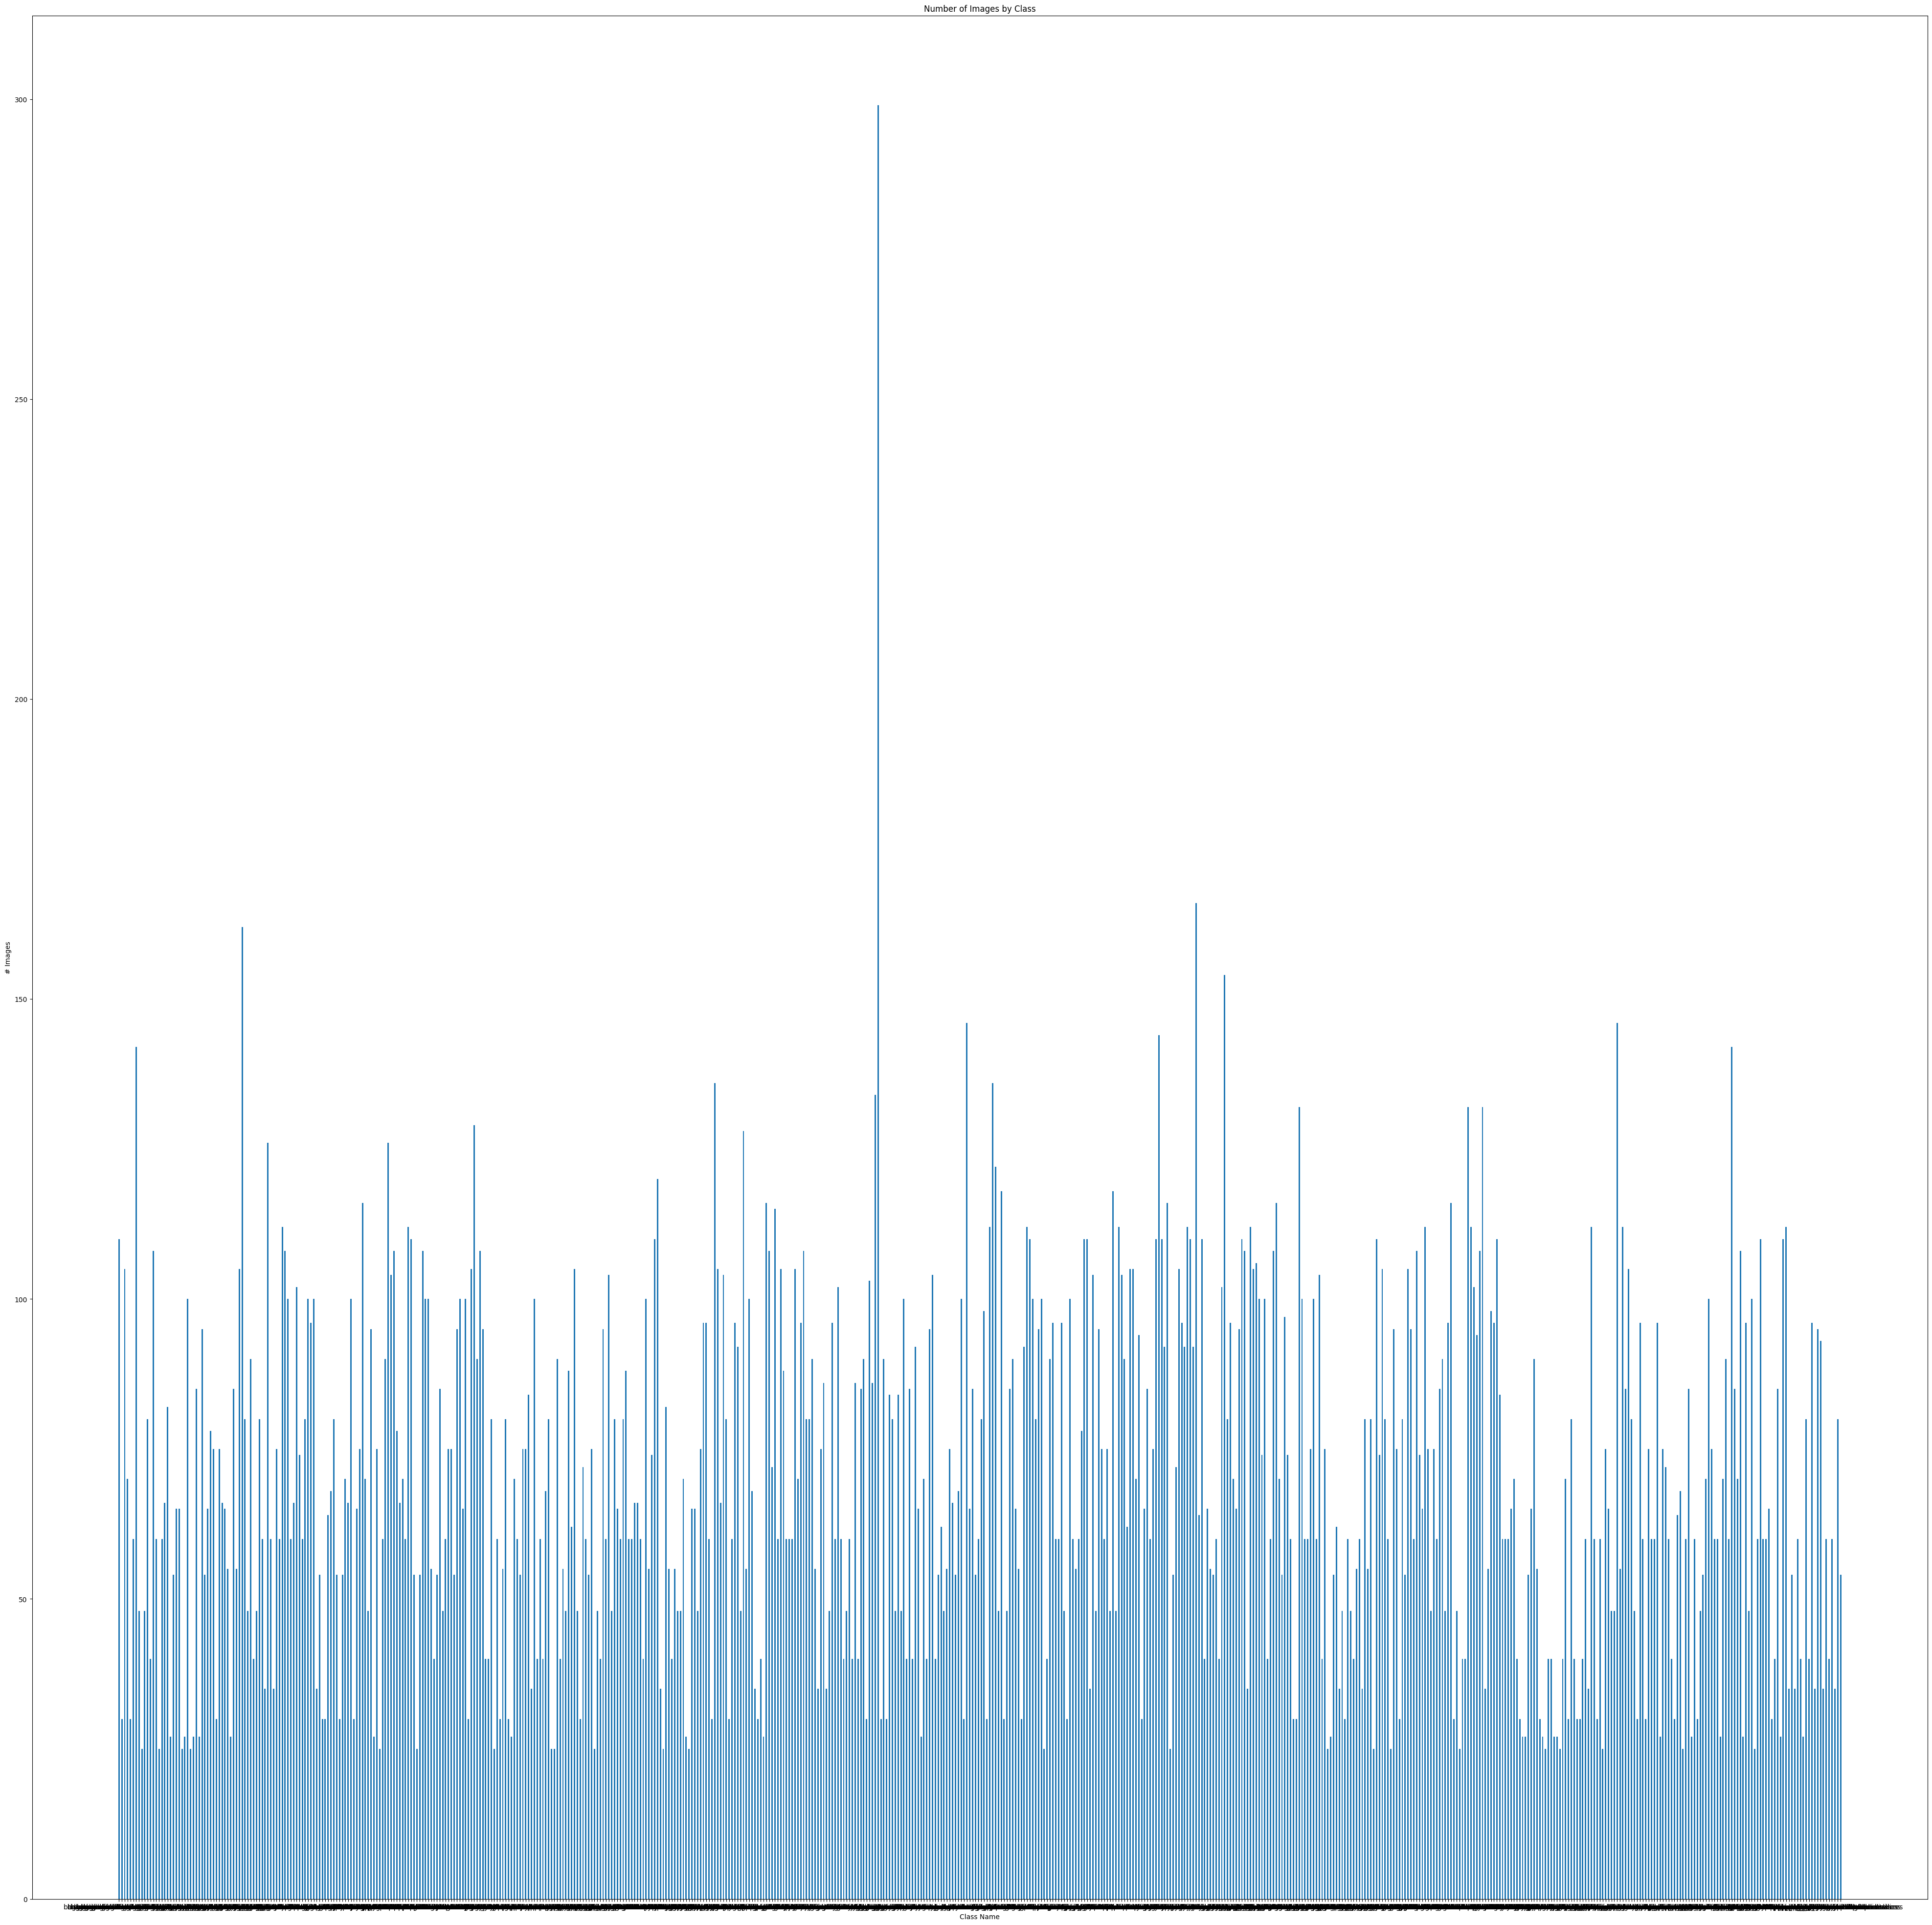

In [70]:
plt.figure(figsize=(50,50))
plt.bar(class_count.keys(), class_count.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

# There is still data imbalance but it's better than before